In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
train_dir = './Training'
test_dir = './Testing'

In [4]:
# Use ImageDataGenerator to import images from the class folders
# Apply data augmentation to the training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #zoom_range=0.1,
    #horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [5]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [6]:
# Class counts seem fairly balanced
class_count = Counter(train_data.classes)
class_count

Counter({2: 1276, 3: 1166, 1: 1072, 0: 1057})

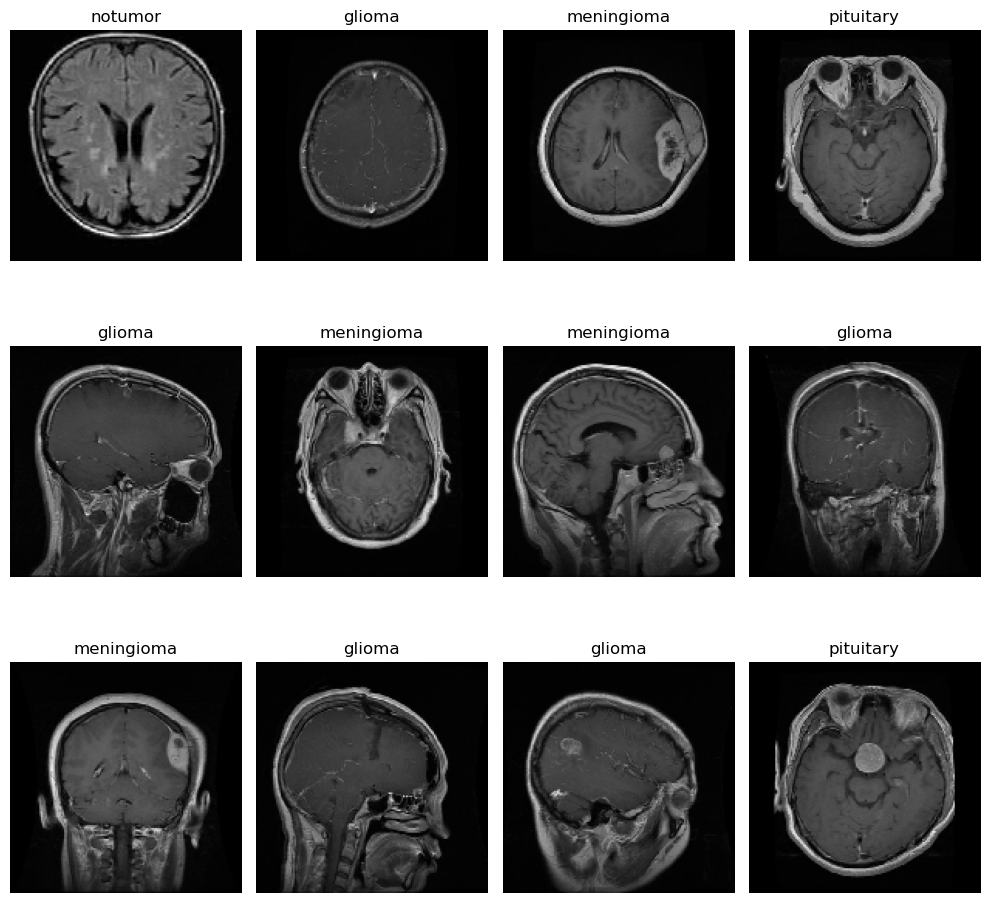

In [7]:
images, labels = next(train_data)
class_names = list(train_data.class_indices.keys())

def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    
    # Display 9 images from the batch
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        label_index = np.argmax(labels[i])
        plt.title(class_names[label_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_images(images, labels, class_names)

In [14]:
images[0].shape

(150, 150, 3)

In [15]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
epochs = 10
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=validation_data
)

Epoch 1/10


2024-09-28 17:49:18.927848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-09-28 17:49:18.951895: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


143/143 [==============================] - ETA: 0s - loss: 0.7704 - accuracy: 0.6745

2024-09-28 17:49:43.844679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


143/143 [==============================] - 27s 187ms/step - loss: 0.7704 - accuracy: 0.6745 - val_loss: 0.8470 - val_accuracy: 0.6740
Epoch 2/10
143/143 [==============================] - 27s 190ms/step - loss: 0.4236 - accuracy: 0.8361 - val_loss: 0.7157 - val_accuracy: 0.7336
Epoch 3/10
143/143 [==============================] - 27s 191ms/step - loss: 0.3030 - accuracy: 0.8897 - val_loss: 0.6209 - val_accuracy: 0.7765
Epoch 4/10
143/143 [==============================] - 29s 204ms/step - loss: 0.2273 - accuracy: 0.9160 - val_loss: 0.6577 - val_accuracy: 0.8002
Epoch 5/10
143/143 [==============================] - 29s 202ms/step - loss: 0.1674 - accuracy: 0.9383 - val_loss: 0.6399 - val_accuracy: 0.8116
Epoch 6/10
143/143 [==============================] - 28s 197ms/step - loss: 0.1257 - accuracy: 0.9514 - val_loss: 0.7115 - val_accuracy: 0.8177
Epoch 7/10
143/143 [==============================] - 28s 192ms/step - loss: 0.0986 - accuracy: 0.9628 - val_loss: 0.8182 - val_accuracy: 0.8

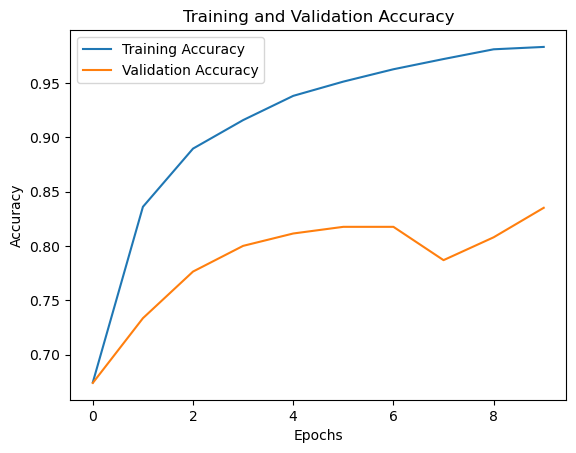

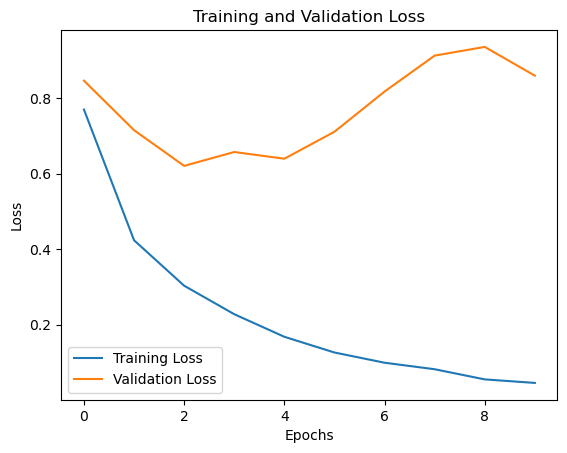

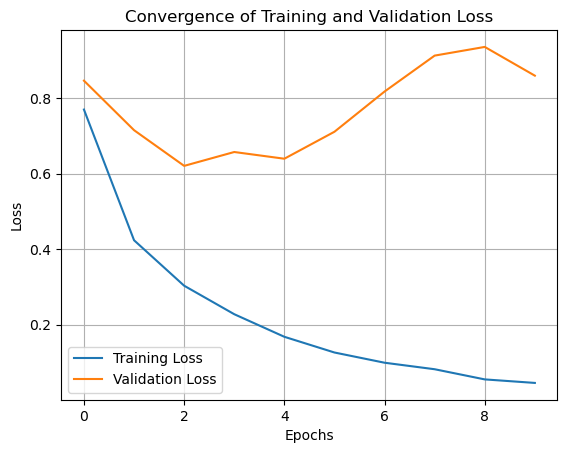

In [18]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# # Make predictions on the test data
# y_pred = np.argmax(model.predict(test_data), axis=1)

# # Get true labels from the test data
# y_true = np.concatenate([y for x, y in test_data], axis=0)
# y_true = np.argmax(y_true, axis=1)

# # Calculate and print the confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# print('Confusion Matrix:\n', cm)

# # Calculate and print the classification report
# cr = classification_report(y_true, y_pred)
# print('Classification Report:\n', cr)

 2/41 [>.............................] - ETA: 2s - loss: 0.2840 - accuracy: 0.9062

2024-09-28 18:28:48.988213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 2s 57ms/step - loss: 0.3992 - accuracy: 0.9085
Test accuracy: 0.9084668159484863
Test loss: 0.39919933676719666


In [47]:
# test_data.reset()

# # Get predictions
# y_pred = np.argmax(model.predict(test_data), axis=1)

# # Collect true labels
# # Is this right?
# y_true = []
# for i in range(len(test_data)):
#     y_true.extend(np.argmax(test_data[i][1], axis=1))

# # Convert to numpy array
# y_true = np.array(y_true)


 2/41 [>.............................] - ETA: 2s

2024-09-28 18:28:10.787939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 2s 56ms/step


In [48]:
y_true

array([3, 0, 1, ..., 3, 2, 0])

In [49]:
# # Calculate and print the confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# print('Confusion Matrix:\n', cm)

# # Calculate and print the classification report
# cr = classification_report(y_true, y_pred)
# print('Classification Report:\n', cr)

Confusion Matrix:
 [[ 62  53 106  79]
 [ 60  65  90  91]
 [ 77  88 138 102]
 [ 68  73  91  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.21      0.22       300
           1       0.23      0.21      0.22       306
           2       0.32      0.34      0.33       405
           3       0.20      0.23      0.21       300

    accuracy                           0.25      1311
   macro avg       0.25      0.25      0.25      1311
weighted avg       0.25      0.25      0.25      1311

